# Experimentación con ScikitLearn

Vamos a realizar un proceso de aprendizaje y experimentación con la libreria ScikitLearn. (basado en el curso NLP modelos y algoritmos de la universidad Austral)

en este caso vamos a practicar lo aprendido en cada modulo del curso.

In [43]:

import re
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import pandas as pd

nlp = spacy.load('es_core_news_lg')

In [4]:
def leer_texto(path_archivo):
    
    """obtiene un string con el texto completro de un archivo

    Returns:
        _string_: 
        string: texto de un archivos
    """

    text = ''
    
    archivo = open(path_archivo, 'r', encoding='utf8')

    while(True):
        linea = archivo.readline()
        text = text+linea
        if not linea:
            break
    
    archivo.close
    
    return text

In [5]:
#importamos los archivos con los que vamos a trabajar

path_petro = './archivos/petro_clean.pdf.txt'
path_fajardo = './archivos/fajardo_clean.pdf.txt'
path_rodolfo = './archivos/rodolfo_clean.pdf.txt'

texto_petro = leer_texto(path_petro)
texto_fajardo = leer_texto(path_fajardo)
texto_rodolfo = leer_texto(path_rodolfo)

In [6]:
#Creamos el corpus de nuestro proceso
corpus =[texto_petro,
         texto_fajardo,
         texto_rodolfo]

In [7]:
#crea el count vectorizer

count_vectorizer = CountVectorizer(analyzer='word',
                                   decode_error='ignore',
                                   encoding='str',
                                   lowercase=True,
                                   stop_words=stopwords.words('spanish'),
                                   strip_accents='ascii',
                                   min_df=2,
                                   max_features=40)

In [8]:

data_vectorized = count_vectorizer.fit_transform(corpus)


/opt/homebrew/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias', 'tuv

In [9]:
data_dtm = pd.DataFrame(data_vectorized.toarray(), columns=count_vectorizer.get_feature_names())

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
data_dtm

,acceso,asi,calidad,cambio,colombia,condiciones,debe,derechos,desarrollo,economia,...,salud,sector,ser,sera,servicios,sistema,social,trabajo,traves,vida
0,52,45,29,43,61,43,11,68,34,87,...,71,22,16,54,30,92,63,59,31,108
1,11,8,16,21,33,6,7,16,38,4,...,22,25,6,10,18,22,16,14,19,14
2,28,32,46,17,116,32,69,19,71,17,...,51,56,58,17,43,52,52,35,38,40


<AxesSubplot:>

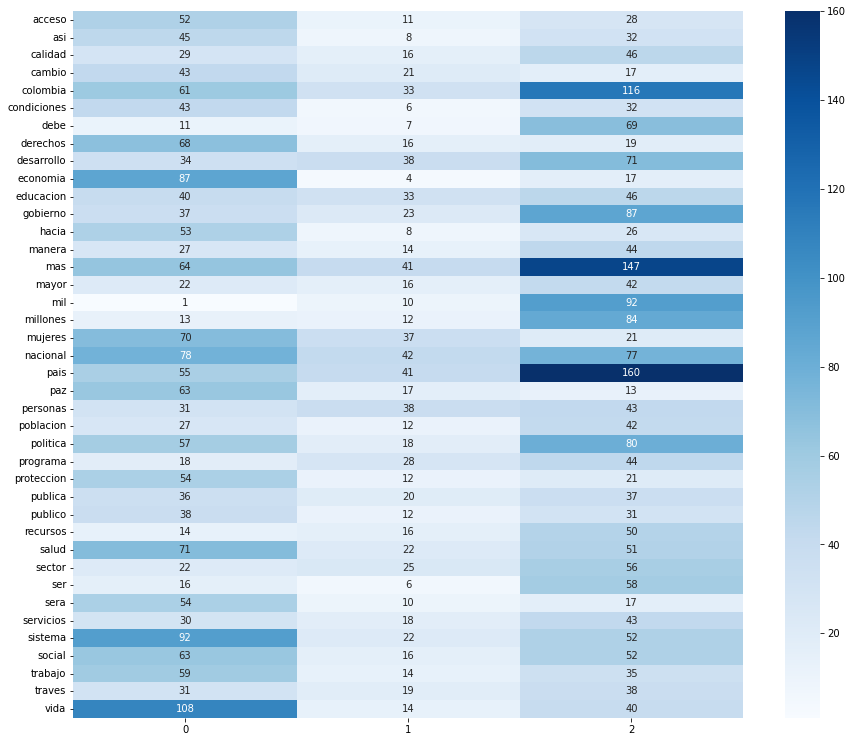

In [11]:
plt.figure(figsize=(15,13))
sns.heatmap(data_dtm.transpose(),
            annot=True,
            cmap="Blues", 
            fmt="d")


# Experimentación con Spacy

vamos a experimentar con la libreria de NLP Spacy que ofrece metodos avanzados para el procesamiento de documentos.

In [19]:
from spacy.lang.es import Spanish
import spacy

lis_ents_petro =[]

nlp = spacy.load('es_core_news_lg')

petro_txt = leer_texto('./archivos/petro_clean.pdf.txt')
fajardo_txt = leer_texto('./archivos/fajardo_clean.pdf.txt')
rodolfo_txt = leer_texto('./archivos/rodolfo_clean.pdf.txt')
federico_txt = leer_texto('./archivos/federico_clean.pdf.txt')

#Creamos los objetos Doc de cada uno de los archivos de planes de gobierno
doc_petro = nlp(petro_txt)
doc_fajardo = nlp(fajardo_txt)
doc_rodolfo = nlp(rodolfo_txt)
doc_federico = nlp(federico_txt)

# Busqueda con spacy

Se puede usar spacy para buscar contenido basado en reglas dentro de los documentos. a continuación se explica el procedimiento.

- crear un objeto Matcher con el vocab del documento
- crear un diccionario con el patron de busqueda
- agregar el o los patrones de busqueda al matcher
- usar el objeto matcher para buscar las coincidencias 

In [21]:
from spacy.matcher import Matcher

#vamos a crear un objeto matcher por cada documento

mth_petro = Matcher(doc_petro.vocab)
mth_fajardo = Matcher(doc_fajardo.vocab)
mth_rodolfo = Matcher(doc_rodolfo.vocab)
mth_federico = Matcher(doc_federico.vocab)

# patron Busqueda PAZ

In [36]:
search_paz = [{'TEXT':'proceso', 'TEXT':'paz'}]

#registramos los match dentro de cada matcher

mth_petro.add('paz', [search_paz])
mth_fajardo.add('paz', [search_paz])
mth_rodolfo.add('paz', [search_paz])
mth_federico.add('paz', [search_paz])

#Ahora buscamos las coincidencias dentro de cada documento

matches_petro = mth_petro(doc_petro)
matches_fajardo = mth_petro(doc_fajardo)
matches_rodolfo = mth_petro(doc_rodolfo)
matches_federico = mth_federico(doc_federico)

In [50]:
#Resultados de coincidencia para petro

lista_paz_petro= []
lista_paz_fajardo = []

for match_id, start, end in matches_petro:
    span = doc_petro[start-5:end+5]
    lista_paz_petro.append(span.text)
    
for match_id, start, end in matches_fajardo:
    span = doc_fajardo[start-5:end+5]
    lista_paz_fajardo.append(span.text)

In [51]:
len(lista_paz_petro)
len(lista_paz_fajardo)

17

In [29]:
#Resultados de coincidencia para fajardo
for match_id, start, end in matches_fajardo:
    string_id = doc_fajardo.vocab.strings[match_id]
    span = doc_fajardo[start:end]
    
    print(match_id, string_id, start, end, span.text)

5709026728910657924 paz 357 358 paz
5709026728910657924 paz 5236 5237 paz
5709026728910657924 paz 5296 5297 paz
5709026728910657924 paz 5332 5333 paz
5709026728910657924 paz 5371 5372 paz
5709026728910657924 paz 5380 5381 paz
5709026728910657924 paz 5645 5646 paz
5709026728910657924 paz 8741 8742 paz
5709026728910657924 paz 8766 8767 paz
5709026728910657924 paz 8969 8970 paz
5709026728910657924 paz 9980 9981 paz
5709026728910657924 paz 10683 10684 paz
5709026728910657924 paz 10688 10689 paz
5709026728910657924 paz 10722 10723 paz
5709026728910657924 paz 10738 10739 paz
5709026728910657924 paz 10917 10918 paz
5709026728910657924 paz 11993 11994 paz


In [30]:
#Resultados de coincidencia para petro
for match_id, start, end in matches_rodolfo:
    string_id = doc_rodolfo.vocab.strings[match_id]
    span = doc_rodolfo[start-5:end+5]
    
    print(span.text)

con colombiael camino hacia la paz reala educación salud enfoque preventivo
de todos los colombianos 1la paz es una condición más allá
ausencia del conflicto armado la paz es la efectiva dignidad en
paíspreámbulou el camino hac ia paz re ales la hora de
el pueblo esta es la paz real 1colombia como un estado
como un derecho vivir en paz dignidad en alguna parte en
del acuerdo final para una paz estable duradera firmado con las
programa de justicia para una paz sostenible de usaid en colombia
la firma del acuerdo de paz con las farc otra después
la firma del acuerdo de paz se han vuelto presentar por
la firma del acuerdo de paz en 2016pero no se trata
estudios para el desarrollo la paz indepaz registra que las disidencias
del eln al acuerdo de paz firmado con las farc basta
